In [1]:
#Librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

#Configuración visualizacion
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Leyendo base 

data = pd.read_csv('/Users/rodolfopardo/Downloads/DATOS - DASHBOARD - DATOS.csv')

In [3]:
#Tenemos 

print('Estamos trabajando con {} datos que contienen {} variables a analizar'.format(data.shape[0], data.shape[1]))

Estamos trabajando con 303 datos que contienen 7 variables a analizar


In [4]:
data.head()

,IMAGEN GOBERNADOR,IMAGEN INTENDENTE,SE INFORMA POR (RANK. 1),MEDIO,RED SOCIAL - RANK 1,FRECUENCIA USO RED SOCIAL,AFINIDAD PERFIL
0,2,1,2,3,5,2,5
1,2,3,1,3,1,3,2
2,5,5,2,5,2,3,3
3,1,1,4,3,3,1,2
4,5,5,5,2,5,5,4


In [54]:
#Tipos de datos 

data.dtypes

IMAGEN GOBERNADOR            int64
IMAGEN INTENDENTE            int64
SE INFORMA POR (RANK. 1)     int64
MEDIO                        int64
RED SOCIAL - RANK 1          int64
FRECUENCIA USO RED SOCIAL    int64
AFINIDAD PERFIL              int64
dtype: object

In [55]:
#Estadistica descriptiva

data.describe()

,IMAGEN GOBERNADOR,IMAGEN INTENDENTE,SE INFORMA POR (RANK. 1),MEDIO,RED SOCIAL - RANK 1,FRECUENCIA USO RED SOCIAL,AFINIDAD PERFIL
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,3.019802,3.006601,3.016502,2.914191,2.996700,3.112211,2.960396
std,1.402317,1.421205,1.377344,1.411599,1.424707,1.395576,1.508831
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [57]:
#Buscando correlaciones

corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,IMAGEN GOBERNADOR,IMAGEN INTENDENTE,SE INFORMA POR (RANK. 1),MEDIO,RED SOCIAL - RANK 1,FRECUENCIA USO RED SOCIAL,AFINIDAD PERFIL
IMAGEN GOBERNADOR,1.000000,-0.029972,0.001545,-0.035940,0.051411,-0.089122,0.066101
IMAGEN INTENDENTE,-0.029972,1.000000,-0.016972,0.008536,0.031082,0.011312,0.041815
SE INFORMA POR (RANK. 1),0.001545,-0.016972,1.000000,-0.091236,0.069212,-0.068150,-0.085725
MEDIO,-0.035940,0.008536,-0.091236,1.000000,0.031142,0.028436,0.007727
RED SOCIAL - RANK 1,0.051411,0.031082,0.069212,0.031142,1.000000,0.030164,0.012262
FRECUENCIA USO RED SOCIAL,-0.089122,0.011312,-0.068150,0.028436,0.030164,1.000000,0.096469
AFINIDAD PERFIL,0.066101,0.041815,-0.085725,0.007727,0.012262,0.096469,1.000000


In [58]:
#Transformación de los datos 

columnas = ['imagen_gob', 'imagen_int', 'se_informa', 'medio', 'red_social', 'uso_redes', 'afinidad']
data.columns = columnas

In [59]:
#Transformación de datos 

def cambio_califica(x):
    data[x] = data[x].map({1: "Muy buena", 2: 'Buena', 3: 'Regular', 4: 'Mala', 5: 'Muy mala'})

cambio_califica('imagen_gob')
cambio_califica('imagen_int')

In [60]:
data['se_informa'] = data['se_informa'].map({1:"Tv", 2: "Radio", 3: "Redes", 4: "Diarios", 5: "Otros"})
data['medio'] = data['medio'].map({1: 'Canal', 2: 'Radio', 3: 'Diario local', 4: 'Red Social', 5: 'Otro'})
data['red_social'] = data['red_social'].map({1: 'Twitter', 2: 'Instagram', 3: 'Facebook', 4: 'Youtube', 5: 'Otros'})
data['uso_redes'] = data['uso_redes'].map({1: 'Muy alta', 2: 'Alta', 3: 'Moderada', 4: 'Baja', 5: 'Muy baja'})
data['afinidad'] = data['afinidad'].map({1: 'Plena', 2: 'Parcial', 3: 'Indiferente', 4: 'Oposición Parcial', 5: 'Oposicion plena'})

In [61]:
#Nueva base

data.head()

,imagen_gob,imagen_int,se_informa,medio,red_social,uso_redes,afinidad
0,Buena,Muy buena,Radio,Diario local,Otros,Alta,Oposicion plena
1,Buena,Regular,Tv,Diario local,Twitter,Moderada,Parcial
2,Muy mala,Muy mala,Radio,Otro,Instagram,Moderada,Indiferente
3,Muy buena,Muy buena,Diarios,Diario local,Facebook,Muy alta,Parcial
4,Muy mala,Muy mala,Otros,Radio,Otros,Muy baja,Oposición Parcial


In [62]:
#Valores

data.imagen_gob.value_counts()

Mala         66
Regular      63
Muy buena    60
Muy mala     58
Buena        56
Name: imagen_gob, dtype: int64

In [63]:
#Porcentajes en valores


data.imagen_gob.value_counts(normalize = True)

Mala         0.217822
Regular      0.207921
Muy buena    0.198020
Muy mala     0.191419
Buena        0.184818
Name: imagen_gob, dtype: float64

In [64]:
#Funcion para graficar en sns

def grafica_count(x,z):
    sns.countplot(x = x, data = data, order = data[x].value_counts().index, palette = z)
    plt.title('Analizando variable {}'.format(x), fontsize = 20)
    plt.xlabel('{}'.format(x))
    plt.show()

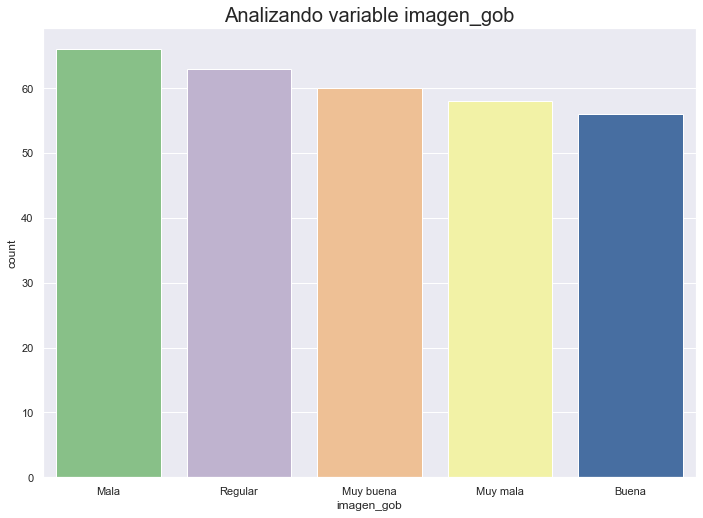

In [65]:
grafica_count('imagen_gob', 'Accent')

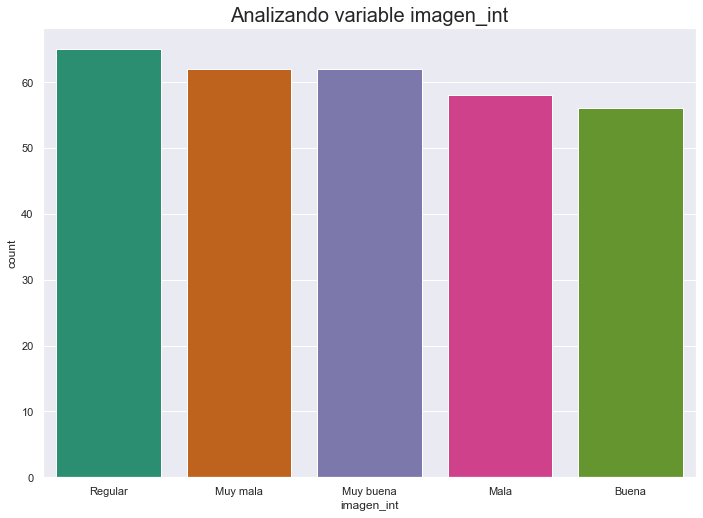

In [66]:
grafica_count('imagen_int', 'Dark2')

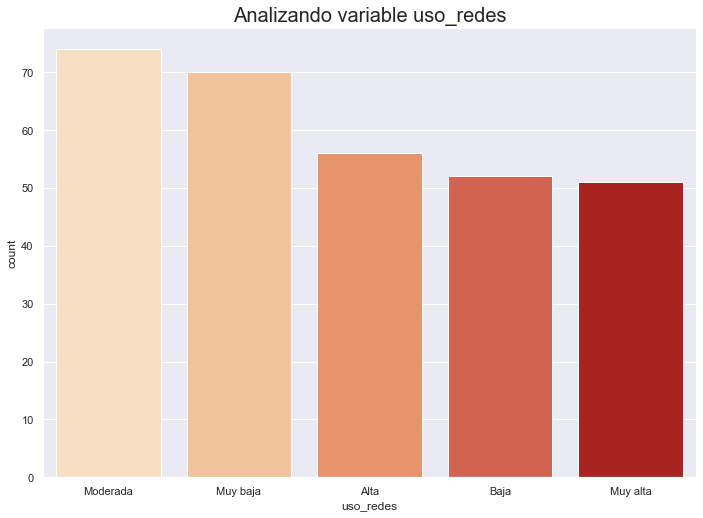

In [73]:
grafica_count('uso_redes', 'OrRd')

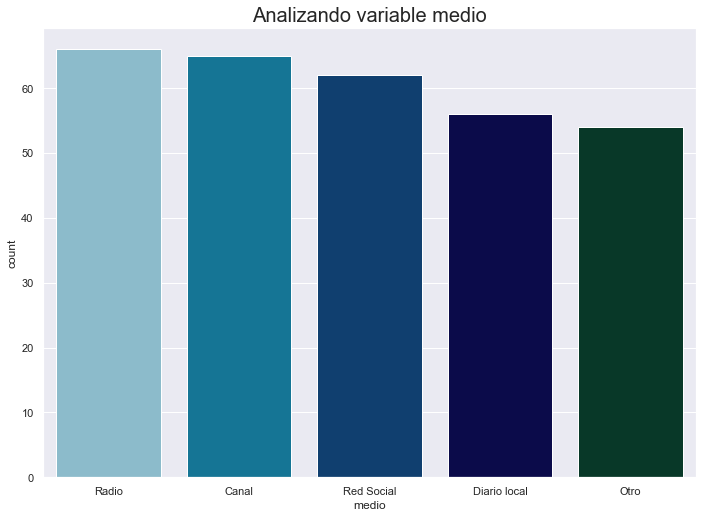

In [67]:
grafica_count('medio', 'ocean_r')

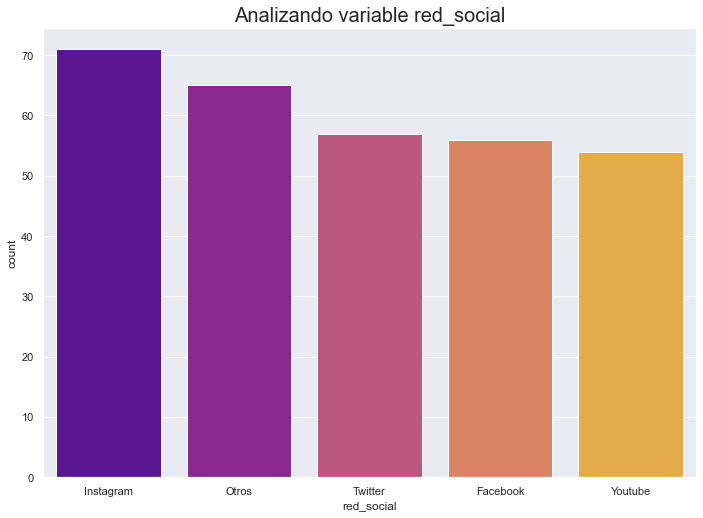

In [68]:
grafica_count('red_social', 'plasma')

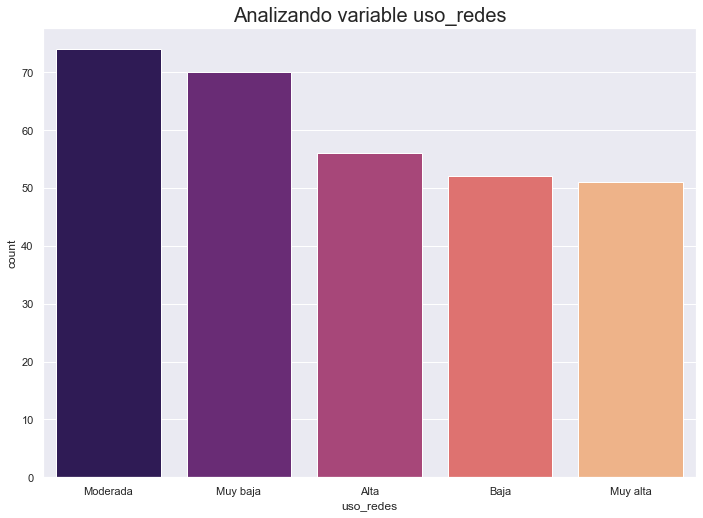

In [69]:
grafica_count('uso_redes', 'magma')

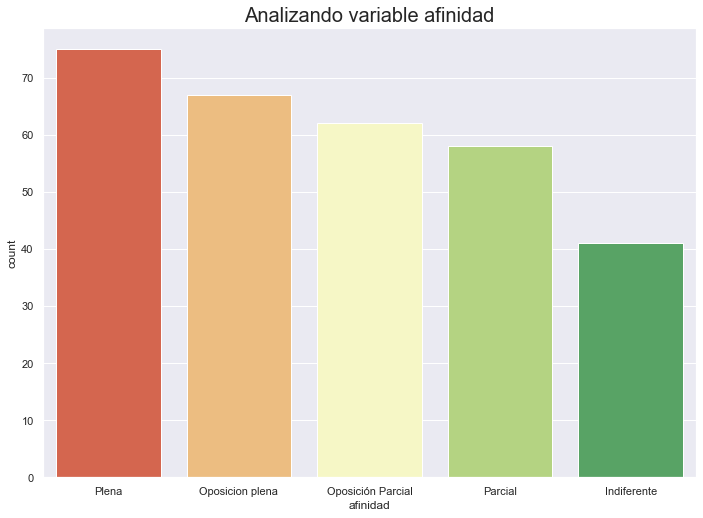

In [71]:
grafica_count('afinidad', 'RdYlGn')

In [19]:
data1 = pd.read_csv("/Users/rodolfopardo/Downloads/Covid19Casos.csv")

In [20]:
data1.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
0,1000000,M,53.0,Años,Argentina,CABA,SIN ESPECIFICAR,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Privado,Caso Descartado,Descartado,2,2020-06-09,0,2020-09-25
1,1000002,M,21.0,Años,Argentina,Buenos Aires,La Matanza,Buenos Aires,NaN,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-01,427,2020-09-25
2,1000003,F,40.0,Años,Argentina,Córdoba,Capital,Córdoba,2020-05-24,2020-06-01,...,NaN,NO,14,Privado,Caso Descartado,Descartado,14,2020-06-01,14,2020-09-25
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-09-25
4,1000006,M,28.0,Años,Argentina,Buenos Aires,Malvinas Argentinas,Buenos Aires,2020-05-30,2020-06-01,...,NaN,NO,6,Público,Caso sospechoso - Con muestra sin resultado,Sospechoso,6,NaN,515,2020-09-25


In [25]:
data1.edad.value_counts()

29.0      47549
28.0      46197
30.0      46162
31.0      45833
32.0      45511
          ...  
112.0         3
109.0         3
131.0         1
118.0         1
1023.0        1
Name: edad, Length: 117, dtype: int64

In [13]:
mendoza = data1[data1['carga_provincia_nombre']== "Mendoza"]

In [14]:
mendoza.shape

(53782, 25)

In [15]:
mendoza.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [16]:
mendoza.head()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
3,1000005,F,58.0,Años,Argentina,Mendoza,Las Heras,Mendoza,NaN,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,49,2020-09-25
122,1000172,F,34.0,Años,Argentina,Mendoza,Las Heras,Mendoza,2020-05-31,2020-06-01,...,NaN,NO,50,Privado,Caso Descartado,Descartado,50,2020-06-01,49,2020-09-25
178,1000258,M,62.0,Años,Argentina,Mendoza,Godoy Cruz,Mendoza,2020-05-30,2020-06-01,...,NaN,NO,50,Público,Caso Descartado,Descartado,50,2020-06-01,21,2020-09-25
231,1000337,M,28.0,Años,Argentina,Mendoza,Las Heras,Mendoza,2020-05-29,2020-06-01,...,NaN,NO,50,Público,Caso Sospechoso - Sin muestra,Sospechoso,50,NaN,49,2020-09-25
432,1000605,F,53.0,Años,Argentina,Mendoza,Guaymallén,Mendoza,2020-05-28,2020-06-01,...,NaN,NO,50,Privado,Caso Descartado,Descartado,50,2020-06-01,28,2020-09-25


In [17]:
mendoza['residencia_departamento_nombre'].value_counts()

Guaymallén           10360
Las Heras             7479
Godoy Cruz            6990
Maipú                 5913
Capital               5187
                     ...  
Patiño                   1
Maracó                   1
Apóstoles                1
José C. Paz              1
Capitán Sarmiento        1
Name: residencia_departamento_nombre, Length: 168, dtype: int64